In [1]:
import matplotlib.pyplot as plt
import numpy as np

Please enter the file name containing the distances result1_D132-H.txt
Please enter the window size (suggested 20) 20
Please enter the plot density adjustment factor (suggested 10) 10
Number of trajectory frames read in:  40000


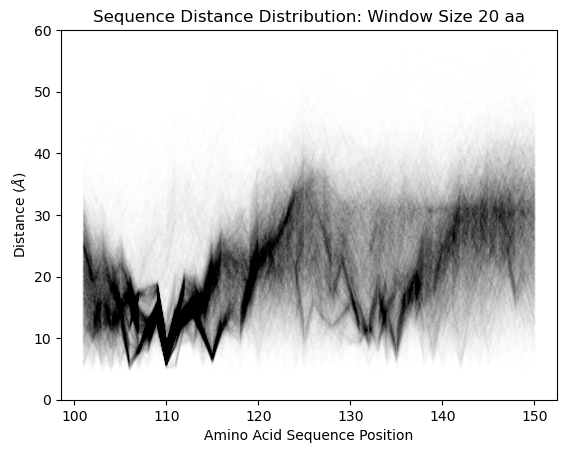

In [2]:
plt.clf()
file_name = input("Please enter the file name containing the distances ")
window    = int(input("Please enter the window size (suggested 20) "))
density   = int(input("Please enter the plot density adjustment factor (suggested 10) "))

data = np.loadtxt(file_name)
frame_number = data.shape[0] #get the number of frames read
print ("Number of trajectory frames read in: ", frame_number)
upper_limit = 70 + 1 - window #max protein length + 1
x_axis = np.arange(1 + window / 2 ,upper_limit + window / 2) + 90

for j in range(0, frame_number, density):
    plt.plot(x_axis, data[j,1:], color = 'black', alpha=0.002) #avoid reading header in y

plt.ylim(0,60)
plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Sequence Distance Distribution: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "local_compaction_plot_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)
plt.show()

In [3]:
average = np.mean(data, axis=0)
stdev   = np.std (data, axis=0)
upper_end = (len(average))

plt.fill_between(x_axis, average [1:upper_end] - stdev [1:upper_end], average [1:upper_end] + stdev [1:upper_end], color='lightblue', alpha=0.4)
plt.plot(x_axis, average [1:upper_end], color="darkblue", linewidth=0.75)

plt.ylim(0,60)
plt.xlabel('Amino Acid Sequence Position')  
plt.ylabel('Distance ($\AA$)')  #Angstrom
plot_name = 'Statistics: Window Size ' + str(window) + ' aa'
plt.title(plot_name) 
figure_name = "statistics_" + str(window) + ".png"
plt.savefig(figure_name, dpi = 300)

In [4]:
# save to csv file
#side_buffer = np.zeros(int((window/2)))
#full_array = np.concatenate([side_buffer,average,side_buffer])

#full_array  = full_array.astype('float')
#full_array[full_array == 0] = 'nan'
#full_array[full_array > 60] = 'nan'

#output_name = 'average_' + str(window) + '_aa.csv'
#np.savetxt(output_name, full_array, delimiter=',')
#print (len(full_array))
#plt.plot(full_array)

In [5]:
!rm result.txt

rm: cannot remove 'result.txt': No such file or directory
